what is PCA?
- PCA, or Principal Component Analysis, is a statistical technique used for dimensionality reduction while preserving as much variance as possible in the data. It transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data. PCA is commonly used in data preprocessing, visualization, and feature extraction in machine learning and statistics.
- It helps in reducing the complexity of the data while retaining its essential patterns, making it easier to analyze and visualize high-dimensional datasets.
- PCA is particularly useful when dealing with high-dimensional data, as it can help to reduce noise and redundancy, making it easier to identify patterns and relationships within the data. It is widely used in various
- fields, including image processing, finance, and bioinformatics, to simplify complex datasets and improve the performance of machine learning algorithms.


# PCA

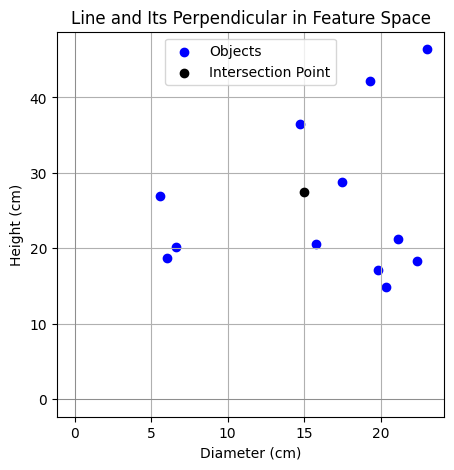

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Original data
data = {
    'diameter': [17.49, 23.01, 20.32, 19.27, 6.65, 6.01, 5.58, 15.80, 14.73, 22.35, 21.13, 19.84],
    'height':   [28.75, 46.40, 14.92, 42.25, 20.14, 18.71, 26.99, 20.63, 36.52, 18.33, 21.25, 17.07]
}
df = pd.DataFrame(data)

# Define the first line (e.g. y = 1.5x + 5)
x_vals = np.linspace(df['diameter'].min(), df['diameter'].max(), 100)
y_vals = 1.5 * x_vals + 5  # Line A

# Choose a point to make perpendicular line pass through
# Let’s take a point on the original line (e.g., x = 15)
x0 = 15
y0 = 1.5 * x0 + 5

# Perpendicular slope
m_perp = -1 / 1.5

# Equation of perpendicular line: y - y0 = m_perp * (x - x0)
# Solve for y
y_perp = m_perp * (x_vals - x0) + y0

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(df['diameter'], df['height'], color='blue', label='Objects')

plt.scatter(x0, y0, color='black', zorder=5, label='Intersection Point')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.xlabel('Diameter (cm)')
plt.ylabel('Height (cm)')
plt.title('Line and Its Perpendicular in Feature Space')
plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

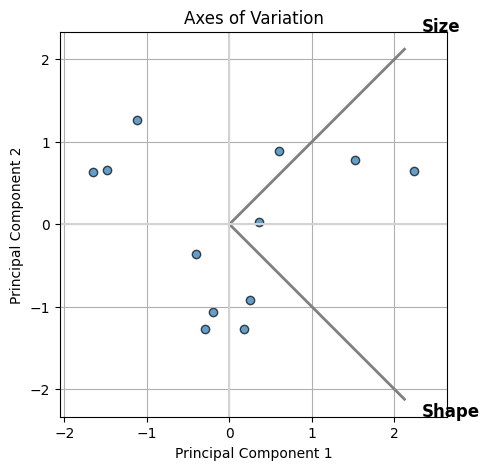

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['height', 'diameter']])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='black')

# Plot PCA axes
for length, vector, name in zip(pca.explained_variance_, pca.components_, ['Size', 'Shape']):
    v = vector * 3  # scale arrow length
    plt.plot([0, v[0]], [0, v[1]], color='gray', linewidth=2)
    plt.text(v[0]*1.1, v[1]*1.1, name, fontsize=12, weight='bold')

plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Axes of Variation")
plt.grid(True)
plt.axis('equal')
plt.show


In [10]:
# principal component analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
transformed_data = pca.transform(df)
transformed_df = pd.DataFrame(transformed_data, columns=['shape', 'size'])
